
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Data Science <br>
<font color=2565AE size=6>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 5 <br>
</div>


---
Name : Raya Namazi

*Link of the notebook* : https://colab.research.google.com/drive/1HBW2y67MrOWJruV6uEThQm_q6FRDlqgC#scrollTo=l6H_6yWTBuOl

---

In this assignment we work on Titanic dataset which is hosted on [kaggle](https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset).
It contains 11,162 instances and 17 features, including demographic details, campaign information, and economic indicators.

### Libraries
Let's import the libraries we will need later on.

In [1302]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Loading the Dataset
Now let's import the dataset.

In [1303]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1304]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Datasets"

In [1305]:
%cd /content/drive/My Drive/Datasets

/content/drive/My Drive/Datasets


In [ ]:
!kaggle datasets download -d janiobachmann/bank-marketing-dataset

Dataset URL: https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset
License(s): CC0-1.0
bank-marketing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  bank-marketing-dataset.zip
replace bank.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1306]:
df = pd.read_csv('bank.csv')

### Getting some insights about the Dataset
Now, let's explore the dataset to see what data it captures and get an overview of it.

In [1307]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


Let's get the shape of the dataset.

In [1308]:
df.shape

(11162, 17)

Let's get an overview of the statistical values for numerical columns.

In [1309]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Coulmn's Description

Now, let's see what data each column contains.

**1-age:** Represents the client's age in years.

**2-job:** Indicates the client's occupation.

**3-marital:** Shows the client's marital status.

**4-education:** Represents the client's highest level of education.

**5-default:** Indicates whether the client has credit in default.

**6-balance:** Represents the client's average yearly balance in euros.

**7-housing:** Shows whether the client has a housing loan.

**8-loan:** Indicates whether the client has a personal loan.

**9-contact:** Specifies the communication method used to reach the client.

**10-day:** Represents the day of the month (1–31) when the client was last contacted.

**11-month:** Indicates the month of the last contact.

**12-duration:** Represents the duration of the last contact in seconds.

**13-campaign:** Indicates the number of contacts made during the current campaign for this client, including the last contact.

**14-pdays:** Represents the number of days since the client was last contacted from a previous campaign (-1 indicates no previous contact).

**15-previous:** Shows the number of contacts made before the current campaign for this client.

**16-poutcome:** Indicates the outcome of the previous marketing campaign for this client.

**17-deposit:** The target variable, indicating whether the client subscribed to a term deposit.

### EDA & Cleaning in action
Now that we are familiar with the features, we can start exploring the dataset and simultaneously check for missing, invalid, or duplicated values.

First, let's see how many missing values we have.

In [1310]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


As it it has shown above there's no missing value. Let's move on to the next step and check for duplicated rows.

In [1311]:
df.duplicated().sum()

np.int64(0)

Now let's see what values some of the catgorical columns contain.

In [1312]:
df['poutcome'].value_counts()

,count
poutcome,
unknown,8326
failure,1228
success,1071
other,537


In [1313]:
df['job'].value_counts()

,count
job,
management,2566
blue-collar,1944
technician,1823
admin.,1334
services,923
retired,778
self-employed,405
student,360
unemployed,357


In [1314]:
df['contact'].value_counts()

,count
contact,
cellular,8042
unknown,2346
telephone,774


In [1315]:
df['education'].value_counts()

,count
education,
secondary,5476
tertiary,3689
primary,1500
unknown,497


In [1316]:
df['marital'].value_counts()

,count
marital,
married,6351
single,3518
divorced,1293


Now that we are here, let's visualize the distribution of values in some of these columns.

Text(0.5, 1.0, 'Contact')

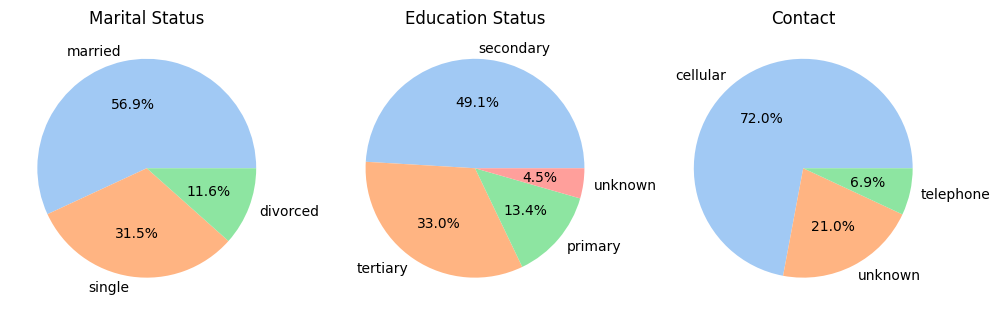

In [1317]:
marital_keys=['married','single','divorced']
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
palette_color = sns.color_palette('pastel')
plt.pie(df['marital'].value_counts(),labels=marital_keys,colors=palette_color,autopct='%1.1f%%')
plt.title('Marital Status')


plt.subplot(1,3,2)
education_keys=['secondary','tertiary','primary','unknown']
palette_color = sns.color_palette('pastel')
plt.pie(df['education'].value_counts(),labels=education_keys,colors=palette_color,autopct='%1.1f%%')
plt.title('Education Status')

plt.subplot(1,3,3)
contact_keys=['cellular','unknown','telephone']
palette_color = sns.color_palette('pastel')
plt.pie(df['contact'].value_counts(),labels=contact_keys,colors=palette_color,autopct='%1.1f%%')
plt.title('Contact')

Let's check the values in the month column to determine the format in which months are stored in this dataset.

In [1318]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

Let's convert them into numerical values so that we can work with them later.

In [1319]:
df['month'] = df['month'].str.capitalize()
df['month'] = pd.to_datetime(df['month'], format='%b', errors='coerce').dt.month

In [1320]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int32)

Now let's check client's ages.

In [1321]:
df['age'].describe()

,age
count,11162.000000
mean,41.231948
std,11.913369
min,18.000000
25%,32.000000
50%,39.000000
75%,49.000000
max,95.000000


As we can see the clients age are between 18 to 95 with mean 41.Let's visualize this column as well.

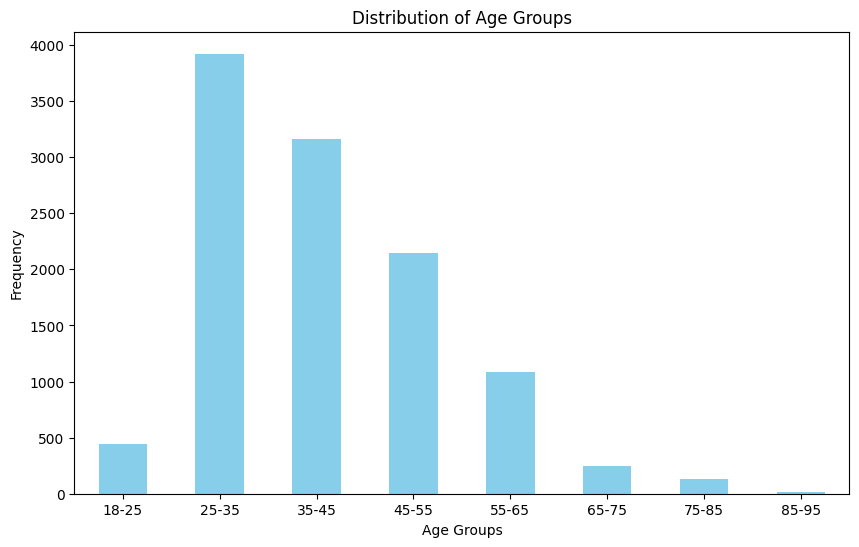

In [1322]:
bins = [18, 25, 35, 45, 55, 65, 75, 85, 95]
label = ['18-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-85', '85-95']

age_group = pd.cut(df['age'], bins=bins, labels=label)

age_group_counts = age_group.value_counts().sort_index()

plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=0)
plt.show()


Let's see what percentage of our clients have subscribed to a term deposit.

Text(0.5, 1.0, 'Deposit Subscription')

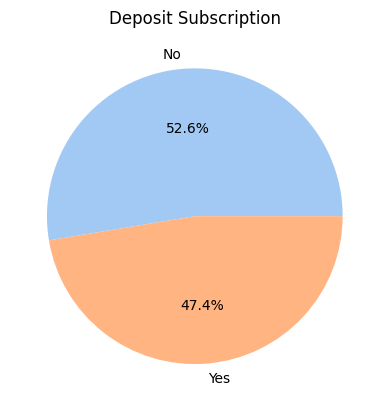

In [1323]:
palette_color = sns.color_palette('pastel')
plt.pie(df['deposit'].value_counts(),labels=['No',"Yes"],colors=palette_color,autopct='%1.1f%%')
plt.title('Deposit Subscription')

Now, let's convert all other categorical columns to numerical values using sklearn.

In [1324]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
to_convert = df[['job','marital','education','default','housing','loan','contact','poutcome','deposit']]
for column in to_convert.columns :
   df[column] = le.fit_transform(df[column])

In [1325]:
df.dtypes

,0
age,int64
job,int64
marital,int64
education,int64
default,int64
balance,int64
housing,int64
loan,int64
contact,int64
day,int64


Let's see how the dataset look after conversion.

In [1326]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,5,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,5,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,5,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,5,673,2,-1,0,3,1
5,42,4,2,2,0,0,1,1,2,5,5,562,2,-1,0,3,1
6,56,4,1,2,0,830,1,1,2,6,5,1201,1,-1,0,3,1
7,60,5,0,1,0,545,1,0,2,6,5,1030,1,-1,0,3,1
8,37,9,1,1,0,1,1,0,2,6,5,608,1,-1,0,3,1
9,28,7,2,1,0,5090,1,0,2,6,5,1297,3,-1,0,3,1


### Normalizing


Before training, let's drop irrelevant features so it would not affect our predictin.

In [1327]:
df = df.drop(['duration', 'contact','poutcome'], axis=1)

In the first step of measuring accuracy, we need to nomrmalize numerical columns of the data that were not encoded.

In [1328]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
columns_to_scale = ['age', 'balance']
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale)
    ],
    remainder='passthrough'
)
scaled_data = preprocessor.fit_transform(df)
new_columns = columns_to_scale + [col for col in df.columns if col not in columns_to_scale]
normalized_df = pd.DataFrame(scaled_data, columns=new_columns)

### Regression
In this Example, the target is the age column.

In [1329]:
target = 'age'
X = normalized_df.drop(target, axis=1)
y = normalized_df[target]

Now we use random forest regression on the dataset where n_estimators is the number of trees in the forest and random_state is the number of seeds for reproducibility.

In [1330]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=.2)
print('training model shape:',X_train.shape)
print('testing model shape:',X_test.shape)

training model shape: (8929, 13)
testing model shape: (2233, 13)


In [1331]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Mean Squared Error
### Mean Squared Error
First accuracy metric we use is MSE.
which is defined as this formula:

$\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$

One of the advantages of the MSE metric is that it is differentiable, making it suitable for optimization, but it is also sensitive to outliers, which can affect the overall measurement.

In [1332]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('MSE is %.4f' %mse)

MSE is 0.5080


### Mean Absolute Error
Now let's calculate MAE defined as:

$\frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|$

MAE is less sensitive to outliers because it treats all errors equally by not squaring them and is in the same unit as the target variable. However, unlike MSE, it is not differentiable at zero, which can make some optimizations more challenging.

In [1333]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE is %.4f' %mae)

MAE is 0.5670


### Mean Absolute Percentage Error
It is defined as:

$\frac{1}{N} \sum_{i=1}^{N} |\frac{y_i - \hat{y}_i}{y_i}|$

We use MAPE to compare the accuracy of different models and datasets because it is not affected by differences in scale. Since it is defined as a percentage, it gives us a better sense of how accurate our models are. However, we need to be cautious about zero values to avoid division by zero errors.


In [1334]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE is %.4f' %mape)

MAPE is 1.3665


Now let's compare MAPE for our trained model to an average predictor

In [1335]:
from sklearn.metrics import mean_absolute_percentage_error
baseline_pred = [y_train.mean()] * len(y_test)
mape_baseline = mean_absolute_percentage_error(y_test, baseline_pred)
print(f"MAPE for baseline is {mape_baseline:.4f}")

MAPE for baseline is 0.9900


So unfortunately our algorithm is doing worse than the average and it may be due to the fact that the features of the dataset are not that relevant to our target :)

###  $R^2$-Score
This is also another accuracy metric.It is used to understand how well our model improved in prediciting the target variable.
The closer the score is to 1, the better out algorithm is.

In [1336]:
from sklearn.metrics import r2_score
R2_score = r2_score(y_test, y_pred)
print('R2 Score is %.4f' %R2_score)

R2 Score is 0.4870




Based on the formula, If we use actual values as our prediction the score should be 1.Let's check this out.

In [1337]:
perfect_R2_score = r2_score(y, y)
print('R2 Score is %.4f' %perfect_R2_score)

R2 Score is 1.0000


### Binary Classification

First let's choose our target which is deposit.

In [1338]:
X = df.drop('deposit', axis=1)
y = df['deposit']

Let's see how our two classes are distributed.

In [1339]:
print('No deposit count: %d' %sum(y==0))
print('Have deposit count: %d' %sum(y==1))

No deposit count: 5873
Have deposit count: 5289


So it is a suitable balance to work on.

Then we split our data into training and testing data.

In [1340]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=.2)
print('training model shape:',X_train.shape)
print('testing model shape:',X_test.shape)

training model shape: (8929, 13)
testing model shape: (2233, 13)


Now let's perform a simple classification.

In [1341]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [1342]:
predicted_deposit = classifier.predict(X_test)

### Classification Accuracy
This metric is a simple measure of the ratio of correct predictions to the total number of data points.

However, it can lead to misunderstandings. For example, if the target variable's classes are not properly distributed, it can affect the accuracy measurement.

In [1343]:
from sklearn.metrics import accuracy_score
print('Calssification accruacy is %.2f' %accuracy_score(predicted_deposit,y_test))

Calssification accruacy is 0.61


### Precision and Recall
Precision and Recall are suitable for imbalanced data unlike classification accuracy.
Precision measures  the accuracy of True Positive which is defiened as:
$\frac{TP}{TP+FP}$

Precision is useful when false positives are costly, and we need to minimize incorrect classifications as positive cases. For example, in fraud detection, a high precision ensures that flagged transactions are truly fraudulent, reducing unnecessary investigations.

Recall measures the ability to capture all positives.
It is defined as:
$\frac{TP}{TP+FN}$

It prioritizes minimizing missed positive cases. This is useful in cancer detection, where it is crucial to ensure that no actual cancer cases are mistakenly classified as negative.


In [1344]:
from sklearn.metrics import precision_score, recall_score
print(' precision is %.2f' %precision_score(y_test, predicted_deposit))
print(' recall is %.2f' %recall_score(y_test, predicted_deposit))

 precision is 0.68
 recall is 0.36


### F1 Score
Now we can calculate F1 score with the use of precision and recall values we already calculated.

F1 score is another classification metric that balances both precision and recall.

In [1345]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predicted_deposit)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.47


### Multi-class Classification
We use education level for the target of our multi-class classification.

In [1346]:
X = df.drop('education', axis=1)
y = df['education']

Now let's see the distribution in our target classes.

In [1347]:
print('Class 0 count: %d' %sum(y==0))
print('Class 1 count: %d' %sum(y==1))
print('Class 2 count: %d' %sum(y==2))
print('Class 3 count: %d' %sum(y==3))

Class 0 count: 1500
Class 1 count: 5476
Class 2 count: 3689
Class 3 count: 497


Class 3 is unknown. let's drop that so it doe not affect our accuracy.

In [1348]:
df = df[df['education'] != 3]

Let's break our dataset into two parts.

In [1349]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.5)

Let's do a simple classification as well.

In [1350]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [1351]:
predicted_education_level = classifier.predict(X_test)

### Precision and Recall
We need to calculate precision and recall for each class individualy.

In [1352]:
precision_array = []
recall_array = []
for c in [0,1,2]:
  actual_class = y_test==c
  predicted_class = predicted_education_level == c

  ture_positives = sum(np.multiply(actual_class,predicted_class))
  declared_positives = sum(predicted_class)
  actual_positives = sum(actual_class)

  precision = ture_positives/(0.0001+ declared_positives)
  recall = ture_positives/(0.0001+ actual_positives)
  precision_array.append(precision)
  recall_array.append(recall)

precision_array = np.array(precision_array)
recall_array = np.array(recall_array)
print('precision array : ',precision_array)
print('recall array : ',recall_array)

precision array :  [0.         0.67306535 0.43229432]
recall array :  [0.         0.40666907 0.94209349]


We can also calculate average precision and recall.

In [1353]:
print('Average precision is: %.2f' %precision_array.mean())
print('Average recall is: %.2f' %recall_array.mean())

Average precision is: 0.37
Average recall is: 0.45


### F1 score
First let's calculate F1 score for each class.

In [1354]:
f1_array = []
for c in [0,1,2]:
  p,r = precision_array[c],recall_array[c]
  f1 = 2*p*r / (p+r)
  f1_array.append(f1)
  print('F1-Score for class %d is %.2f' %(c,f1))

F1-Score for class 0 is nan
F1-Score for class 1 is 0.51
F1-Score for class 2 is 0.59


<ipython-input-1354-a41cb2c95d74>:4: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2*p*r / (p+r)


### Macro F1 Score
Now, let's calculate the Macro F1 score.

It computes the average of the F1 scores for all classes without weighting them based on class distribution, treating each class equally regardless of its frequency so it may not be suitable for imbalanced classes.

In [1355]:
from sklearn.metrics import f1_score
f1s = f1_score(y_test, predicted_education_level, average='macro')
print('Macro-averaged F1-score is %.2f' %f1s)

Macro-averaged F1-score is 0.27


### Weighted F1 Score
weighted F1 score calculates average weighted F1 scores of classes but it put more emphasis on larger classes which affects the accuracy measurements.

In [1356]:
print('Weighted F1-score is %.2f' %f1_score(y_test, predicted_education_level, average='weighted'))

Weighted F1-score is 0.44


### Micro F1 Score
Micro F1 score is suitable to understand overall performance, when the classes are imbalanced and larger classes are more important since it priotrizes majorities.

In [1357]:
print('Micro F1-score is %.2f' %f1_score(y_test, predicted_education_level, average='micro'))

Micro F1-score is 0.50


### Multi-label Classification
For this part, we create a simple dataset using sklearn.

In our example, we have a multi-label classification problem that it contains these labels:

Class 1: The player has played for the national team before.

Class 2: The player had previous history of heart problems.

Class 3: The player had knee injuries before.

Class 4: The player has been the captain of the team in the past.

In [1358]:
from sklearn.datasets import make_multilabel_classification
X, Y = make_multilabel_classification(
    n_samples=500, n_features=10,
    n_classes=4, n_labels=4,
    allow_unlabeled=True,
)

n_samples: Number of rows(samples) in the dataset

n_features: Number of features(columns) in the dataset.

n_classes: Total number of (classes)labels.

n_labels: The average number of labels per sample.

allow_unlabeled: Ensures each sample has at least one label.

X is the dataset with features and Y is the dataset that contains labels for each sample.

In [1359]:
X.shape,Y.shape

((500, 10), (500, 4))

### Multi-label Prediction
Now we are ready to create a simple prediction using sklearn
In the first step, we split our data into train and test sets

In [1360]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2)

Next, we create a multilabel prediction using OneVsRestClassifier.

OvR creates a classifier per each label which predicts whether a sample belongs to a specific label or not and the classifier trains each SVC with different targets(one for each label).

We use linear kernel which is a simple function for SVM. It computes the dot products between two input vectors and separates datapoints linearly.

In [1361]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
classifier = OneVsRestClassifier(SVC(kernel='linear'))
classifier.fit(X_train, Y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear'))

Now we predict on our testing set.

In [1362]:
predictions = classifier.predict(X_test)

### Suitable Accuracy Metric
For this classification problem, where each player can belong to any of these labels, it's better to use the Hamming Score.

The reason for choosing this metric is that all labels are independent of each other, and each holds distinct importance. Therefore, it is preferable to use a metric that evaluates each label individually and emphasizes them equally.

### Hamming Score

Hamming score, unlike the exact match ratio, is a function that calculates the number of true positives for each sample vector per label.

It is defined as:

$
\text{Hamming Score} = \frac{1}{N \cdot L} \sum_{i=1}^{N} \sum_{j=1}^{L} \mathbb{I}(y_{i,j} = \hat{y}_{i,j})$



We calculate hamming score as the complement of hamming loss with sklearn.metrics.

In [1363]:
from sklearn.metrics import hamming_loss
hamming_loss = hamming_loss(Y_test,predictions)
hamming_score = 1-hamming_loss
print('Hamming Loss is %.2f' %hamming_loss)
print('Hamming Score is %.2f' %hamming_score)

Hamming Loss is 0.18
Hamming Score is 0.81


The above results indicate that our classification is pretty accurate.